## Gas Sensor Array Drift - Modelagem

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
seed = 10

### Leitura dos Dados

In [3]:
dataset = pd.read_csv('../Dataset/dataset.csv')
dataset_pca = pd.read_csv('../Dataset/dataset_pca.csv')

In [4]:
print(dataset.shape)
dataset.head()

(13910, 129)


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373,1.0
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699,1.0
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836,1.0
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164,1.0
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519,1.0


## Separação dos dados

In [5]:
X = dataset.drop('target', axis=1)
y = dataset.loc[:,'target']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

## Classificação

In [10]:
kfold = StratifiedKFold(n_splits=10, random_state=seed)

### k-NN

### Sem PCA 

In [146]:
results = []
for k in range(1, 11):
    for metric in ['euclidean', 'manhattan', 'chebyshev']:
        params = {'n_neighbors': k, 'metric': metric}
        
        clf_knn = KNeighborsClassifier(**params)
        
        scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold)
        scores_mean = scores.mean()
        scores_std = scores.std()
        
        results.append((params, scores_mean, scores_std))
        
        print('Acuracia - KNN: k = %2d, metric = %s, scores: %0.3f' % (k, metric, scores_mean))

Acuracia - KNN: k =  1, metric = euclidean, scores: 0.995
Acuracia - KNN: k =  1, metric = manhattan, scores: 0.996
Acuracia - KNN: k =  1, metric = chebyshev, scores: 0.992
Acuracia - KNN: k =  2, metric = euclidean, scores: 0.994
Acuracia - KNN: k =  2, metric = manhattan, scores: 0.995
Acuracia - KNN: k =  2, metric = chebyshev, scores: 0.989
Acuracia - KNN: k =  3, metric = euclidean, scores: 0.993
Acuracia - KNN: k =  3, metric = manhattan, scores: 0.995
Acuracia - KNN: k =  3, metric = chebyshev, scores: 0.988
Acuracia - KNN: k =  4, metric = euclidean, scores: 0.992
Acuracia - KNN: k =  4, metric = manhattan, scores: 0.994
Acuracia - KNN: k =  4, metric = chebyshev, scores: 0.987
Acuracia - KNN: k =  5, metric = euclidean, scores: 0.991
Acuracia - KNN: k =  5, metric = manhattan, scores: 0.993
Acuracia - KNN: k =  5, metric = chebyshev, scores: 0.986
Acuracia - KNN: k =  6, metric = euclidean, scores: 0.990
Acuracia - KNN: k =  6, metric = manhattan, scores: 0.992
Acuracia - KNN

In [147]:
results = np.array(results)
idx_best_result = results[:, 1].argmax()
results[idx_best_result]

array([{'n_neighbors': 1, 'metric': 'manhattan'}, 0.9960687459155222,
       0.001389698920687762], dtype=object)

In [148]:
df_results = pd.DataFrame(results)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'k', 'metric']
df_results.head()

,score_mean,score_std,k,metric
0,0.994919,0.00231077,1,euclidean
1,0.996069,0.0013897,1,manhattan
2,0.992139,0.00226272,1,chebyshev
3,0.994248,0.00231098,2,euclidean
4,0.995302,0.00174304,2,manhattan


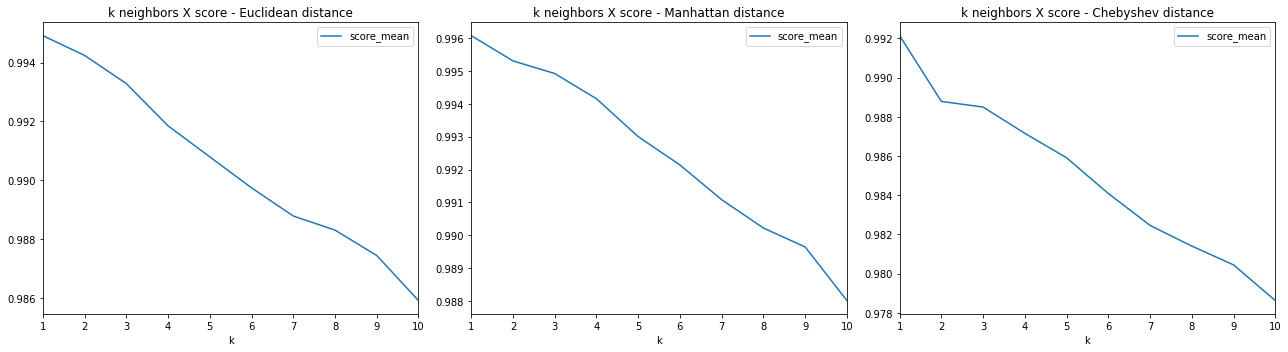

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

df_results[df_results['metric'] == 'euclidean'].plot(x='k', y='score_mean', ax=axs[0], title='k neighbors X score - Euclidean distance')
df_results[df_results['metric'] == 'manhattan'].plot(x='k', y='score_mean', ax=axs[1], title='k neighbors X score - Manhattan distance')
df_results[df_results['metric'] == 'chebyshev'].plot(x='k', y='score_mean', ax=axs[2], title='k neighbors X score - Chebyshev distance')

plt.tight_layout()
plt.show()

In [151]:
results_2 = []
for k in range(1, 4):
    for weight in ['uniform', 'distance']:
        params = {'n_neighbors': k, 'weights': weight}
        
        clf_knn = KNeighborsClassifier(**params, metric='manhattan')
        
        scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold)
        scores_mean = scores.mean()
        scores_std = scores.std()
        
        results_2.append((params, scores_mean, scores_std))
        
        print('Acuracia - KNN: k = %2d, metric = %s, scores: %0.3f' % (k, weight, scores_mean))

Acuracia - KNN: k =  1, metric = uniform, scores: 0.996
Acuracia - KNN: k =  1, metric = distance, scores: 0.996
Acuracia - KNN: k =  2, metric = uniform, scores: 0.995
Acuracia - KNN: k =  2, metric = distance, scores: 0.996
Acuracia - KNN: k =  3, metric = uniform, scores: 0.995
Acuracia - KNN: k =  3, metric = distance, scores: 0.996


In [152]:
results_2 = np.array(results_2)
idx_best_result = results_2[:, 1].argmax()
results_2[idx_best_result]

array([{'n_neighbors': 3, 'weights': 'distance'}, 0.9960689304708309,
       0.0015155424884396689], dtype=object)

In [153]:
df_results = pd.DataFrame(results_2)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'k', 'weight']
df_results.sort_values('score_mean', ascending=False).head()

,score_mean,score_std,k,weight
5,0.996069,0.00151554,3,distance
0,0.996069,0.0013897,1,uniform
1,0.996069,0.0013897,1,distance
3,0.996069,0.0013897,2,distance
2,0.995302,0.00174304,2,uniform


### Com PCA

In [8]:
X = dataset_pca.drop('target', axis=1)
y = dataset_pca.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [11]:
results = []
for k in range(1, 11):
    for metric in ['euclidean', 'manhattan', 'chebyshev']:
        params = {'n_neighbors': k, 'metric': metric}
        
        clf_knn = KNeighborsClassifier(**params)
        
        scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold)
        scores_mean = scores.mean()
        scores_std = scores.std()
        
        results.append((params, scores_mean, scores_std))
        
        print('Acuracia - KNN: k = %2d, metric = %s, scores: %0.3f' % (k, metric, scores_mean))

Acuracia - KNN: k =  1, metric = euclidean, scores: 0.995
Acuracia - KNN: k =  1, metric = manhattan, scores: 0.996
Acuracia - KNN: k =  1, metric = chebyshev, scores: 0.993
Acuracia - KNN: k =  2, metric = euclidean, scores: 0.994
Acuracia - KNN: k =  2, metric = manhattan, scores: 0.995
Acuracia - KNN: k =  2, metric = chebyshev, scores: 0.992
Acuracia - KNN: k =  3, metric = euclidean, scores: 0.993
Acuracia - KNN: k =  3, metric = manhattan, scores: 0.995
Acuracia - KNN: k =  3, metric = chebyshev, scores: 0.991
Acuracia - KNN: k =  4, metric = euclidean, scores: 0.992
Acuracia - KNN: k =  4, metric = manhattan, scores: 0.994
Acuracia - KNN: k =  4, metric = chebyshev, scores: 0.989
Acuracia - KNN: k =  5, metric = euclidean, scores: 0.991
Acuracia - KNN: k =  5, metric = manhattan, scores: 0.993
Acuracia - KNN: k =  5, metric = chebyshev, scores: 0.987
Acuracia - KNN: k =  6, metric = euclidean, scores: 0.990
Acuracia - KNN: k =  6, metric = manhattan, scores: 0.993
Acuracia - KNN

In [12]:
results = np.array(results)
idx_best_result = results[:, 1].argmax()
results[idx_best_result]

array([{'n_neighbors': 1, 'metric': 'manhattan'}, 0.9958774482577667,
       0.002190101118254926], dtype=object)

In [13]:
df_results = pd.DataFrame(results)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'k', 'metric']
df_results.head()

,score_mean,score_std,k,metric
0,0.995207,0.00222842,1,euclidean
1,0.995877,0.0021901,1,manhattan
2,0.993481,0.00249472,1,chebyshev
3,0.994152,0.00255525,2,euclidean
4,0.995015,0.00230271,2,manhattan


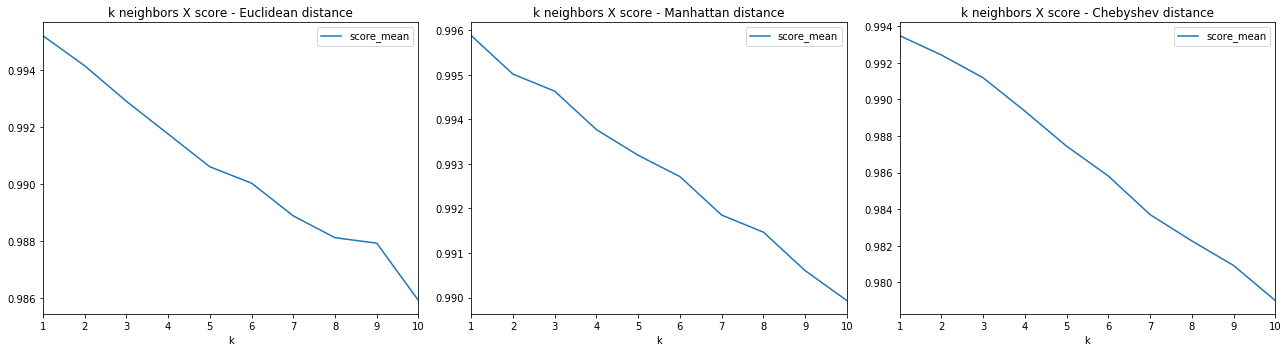

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

df_results[df_results['metric'] == 'euclidean'].plot(x='k', y='score_mean', ax=axs[0], title='k neighbors X score - Euclidean distance')
df_results[df_results['metric'] == 'manhattan'].plot(x='k', y='score_mean', ax=axs[1], title='k neighbors X score - Manhattan distance')
df_results[df_results['metric'] == 'chebyshev'].plot(x='k', y='score_mean', ax=axs[2], title='k neighbors X score - Chebyshev distance')

plt.tight_layout()
plt.show()

In [15]:
results_2 = []
for k in range(1, 4):
    for weight in ['uniform', 'distance']:
        params = {'n_neighbors': k, 'weights': weight}
        
        clf_knn = KNeighborsClassifier(**params, metric='manhattan')
        
        scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold)
        scores_mean = scores.mean()
        scores_std = scores.std()
        
        results_2.append((params, scores_mean, scores_std))
        
        print('Acuracia - KNN: k = %2d, metric = %s, scores: %0.3f' % (k, weight, scores_mean))

Acuracia - KNN: k =  1, metric = uniform, scores: 0.996
Acuracia - KNN: k =  1, metric = distance, scores: 0.996
Acuracia - KNN: k =  2, metric = uniform, scores: 0.995
Acuracia - KNN: k =  2, metric = distance, scores: 0.996
Acuracia - KNN: k =  3, metric = uniform, scores: 0.995
Acuracia - KNN: k =  3, metric = distance, scores: 0.996


In [16]:
results_2 = np.array(results_2)
idx_best_result = results_2[:, 1].argmax()
results_2[idx_best_result]

array([{'n_neighbors': 1, 'weights': 'uniform'}, 0.9958774482577667,
       0.002190101118254926], dtype=object)

In [17]:
df_results = pd.DataFrame(results_2)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'k', 'weight']
df_results.sort_values('score_mean', ascending=False).head()

,score_mean,score_std,k,weight
0,0.995877,0.0021901,1,uniform
1,0.995877,0.0021901,1,distance
3,0.995877,0.0021901,2,distance
5,0.99559,0.00227517,3,distance
2,0.995015,0.00230271,2,uniform


## Random Forest

In [20]:
results = []
for n_estimators in range(10,401,20):
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=10, n_jobs=-1)
    
    scores = cross_val_score(clf_rf, X_train, y_train, cv=kfold)
    scores_mean = scores.mean()
    scores_std = scores.std()
    
    results.append(({'n_estimators': n_estimators}, scores_mean, scores_std))

    print('Acuracia - RF: n_estimators = %2d, scores: %0.3f' % (n_estimators, scores_mean))

Acuracia - RF: n_estimators = 10, scores: 0.993
Acuracia - RF: n_estimators = 30, scores: 0.994
Acuracia - RF: n_estimators = 50, scores: 0.994
Acuracia - RF: n_estimators = 70, scores: 0.994
Acuracia - RF: n_estimators = 90, scores: 0.994
Acuracia - RF: n_estimators = 110, scores: 0.994
Acuracia - RF: n_estimators = 130, scores: 0.994
Acuracia - RF: n_estimators = 150, scores: 0.994
Acuracia - RF: n_estimators = 170, scores: 0.994
Acuracia - RF: n_estimators = 190, scores: 0.994
Acuracia - RF: n_estimators = 210, scores: 0.994
Acuracia - RF: n_estimators = 230, scores: 0.994
Acuracia - RF: n_estimators = 250, scores: 0.994
Acuracia - RF: n_estimators = 270, scores: 0.994
Acuracia - RF: n_estimators = 290, scores: 0.994
Acuracia - RF: n_estimators = 310, scores: 0.994
Acuracia - RF: n_estimators = 330, scores: 0.994
Acuracia - RF: n_estimators = 350, scores: 0.994
Acuracia - RF: n_estimators = 370, scores: 0.994
Acuracia - RF: n_estimators = 390, scores: 0.994


In [21]:
results = np.array(results)
idx_best_result = results[:, 1].argmax()
results[idx_best_result]

array([{'n_estimators': 110}, 0.9944402058863577, 0.002599884725692586],
      dtype=object)

In [22]:
df_results = pd.DataFrame(results)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'n_estimators']
df_results.head()

,score_mean,score_std,n_estimators
0,0.992524,0.0028659,10
1,0.993674,0.00318326,30
2,0.993962,0.00296832,50
3,0.993961,0.00281137,70
4,0.993961,0.00267924,90


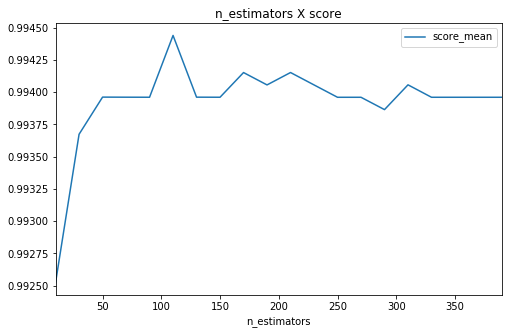

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

df_results.plot(x='n_estimators', y='score_mean', ax=ax, title='n_estimators X score')
plt.show()